In [1]:
#import modules needed
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
import sklearn

__Read in cleaned dataset__

In [2]:
df = df = pd.read_csv('availbikes.csv', sep=',\s+', delimiter=',')

In [3]:
df=sklearn.utils.shuffle(df)

In [4]:
df.head()

,StationNumber,available_bikes_stands,available_bikes,description,temp,temp_min,temp_max,humidity,Day,TimeOfDay
61114,6,17,3,scattered clouds,9,8,9,57,Sunday,Evening
286144,37,26,4,scattered clouds,12,12,12,76,Thursday,Afternoon
283854,52,27,5,light rain,10,9,11,76,Thursday,Morning
207101,95,27,13,broken clouds,8,7,10,93,Friday,Morning
199999,43,12,18,broken clouds,11,11,12,82,Thursday,Evening


__Drop columns not needed for model__:

In [5]:
df=df.drop(['temp_min', 'temp_max', 'humidity'], axis=1)

In [6]:
df

,StationNumber,available_bikes_stands,available_bikes,description,temp,Day,TimeOfDay
61114,6,17,3,scattered clouds,9,Sunday,Evening
286144,37,26,4,scattered clouds,12,Thursday,Afternoon
283854,52,27,5,light rain,10,Thursday,Morning
207101,95,27,13,broken clouds,8,Friday,Morning
199999,43,12,18,broken clouds,11,Thursday,Evening
...,...,...,...,...,...,...,...
169781,73,20,9,scattered clouds,13,Tuesday,Afternoon
181262,111,26,14,broken clouds,9,Wednesday,Morning
268164,116,16,14,broken clouds,6,Wednesday,Night
228151,4,6,14,broken clouds,8,Sunday,Night


In [7]:
df.StationNumber.nunique()

109

__Define a function to encode data__

In [8]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        le = preprocessing.LabelEncoder()
        data[column_name + 'NEW'] = preprocessing.LabelEncoder().fit_transform(data[column_name])
        
    return data


__Declare Categorical Data__

In [9]:
list_le_cols=['description', 'Day', 'TimeOfDay']

In [10]:
# cat_cols_df = df[['description', 'Day', 'TimeOfDay']].copy()

In [11]:
df =  label_enocder(df, list_le_cols)

In [12]:
descriptionNEW_vals = df['descriptionNEW'].unique().tolist()
time_New_vals = df['TimeOfDayNEW'].unique().tolist()
DayNEW_vals = df['DayNEW'].unique().tolist()

__Create Dictionaries to store the original and encoded values for each categorical Feature__

In [13]:
description_dict={}
for vals in descriptionNEW_vals:
    description_dict[vals]=df.loc[df['descriptionNEW'] == vals, 'description'].iloc[0]
description_dict

{9: 'scattered clouds',
 5: 'light rain',
 0: 'broken clouds',
 2: 'few clouds',
 8: 'overcast clouds',
 1: 'clear sky',
 4: 'light intensity drizzle',
 6: 'mist',
 7: 'moderate rain',
 3: 'heavy intensity rain'}

In [14]:
TimeOfDayDict={}
for vals in time_New_vals:
    TimeOfDayDict[vals]=df.loc[df['TimeOfDayNEW'] == vals, 'TimeOfDay'].iloc[0]
TimeOfDayDict  

{1: 'Evening', 0: 'Afternoon', 2: 'Morning', 3: 'Night'}

In [15]:
DayDict={}
for vals in DayNEW_vals:
    DayDict[vals]=df.loc[df['DayNEW'] == vals, 'Day'].iloc[0]
DayDict  

{3: 'Sunday',
 4: 'Thursday',
 0: 'Friday',
 2: 'Saturday',
 1: 'Monday',
 5: 'Tuesday',
 6: 'Wednesday'}

In [16]:
#drop the un encoded cat columns
df = df.drop(['Day', 'TimeOfDay', 'description'], axis=1)

In [17]:
df

,StationNumber,available_bikes_stands,available_bikes,temp,descriptionNEW,DayNEW,TimeOfDayNEW
61114,6,17,3,9,9,3,1
286144,37,26,4,12,9,4,0
283854,52,27,5,10,5,4,2
207101,95,27,13,8,0,0,2
199999,43,12,18,11,0,4,1
...,...,...,...,...,...,...,...
169781,73,20,9,13,9,5,0
181262,111,26,14,9,0,6,2
268164,116,16,14,6,0,6,3
228151,4,6,14,8,0,3,3


__Seperate Dataframe into a list of df's grouped by station number__

In [18]:
dfseperated = [x for _, x in df.groupby('StationNumber')]
        

In [19]:
dfseperated[0]

,StationNumber,available_bikes_stands,available_bikes,temp,descriptionNEW,DayNEW,TimeOfDayNEW
68181,2,20,0,5,5,1,3
23200,2,17,3,5,0,4,0
25372,2,17,3,5,0,4,1
146671,2,4,16,10,5,3,0
239319,2,10,10,8,0,3,1
...,...,...,...,...,...,...,...
237469,2,12,8,9,9,3,1
29797,2,16,4,5,0,0,3
42450,2,9,11,1,0,2,3
275443,2,18,2,11,0,6,1


__Declare Target Values__

In [20]:
predict = 'available_bikes'

In [21]:
predictStands='available_bikes_stands'

__Store Station Numbers in List - Visualisation Purposes__

In [22]:
stations=[]
for index in range(len(dfseperated)):
    stations+=[dfseperated[index].StationNumber.unique().tolist()]
len(stations)

109

__KNeighbors Classifier for Bikes Available - Each station model stored in a dict__

In [31]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
bikesDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes'], 1))
    y = np.array(dfseperated[index][predict])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
   
    acc = model.score(x_test, y_test)
#     print("Station Number:", stationNum) 
#     print("Accuracy: ",acc*100)    
    bikesDict[stationNum]=model
#     filename=(str(stationNum) + "Bikes.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


__KNeighbors Classifier for Stands Available - Each station model stored in a dict__

In [33]:
import pickle
StandsDict={}
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes_stands'], 1))
    y = np.array(dfseperated[index][predictStands])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
#     print("Station Number:", stationNum)
#     print("Accuracy: ",acc*100)    
    
    StandsDict[stationNum]=model
#     filename=(str(stationNum) + "Stands.pkl")
#     with open(filename, "wb") as f:
#         pickle.dump(model, f)


__Demonstrating Model for Station 117__

In [27]:
model_Station117=StandsDict[117]

In [28]:
predictions = model_Station117.predict(x_test)

In [34]:
# for x in range(len(predictions)):
#     print("Predicted: ", predictions[x], "Actual: ", y_test[x])

C:\Users\jelly\anaconda3\envs\comp47350py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jelly\anaconda3\envs\comp47350py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


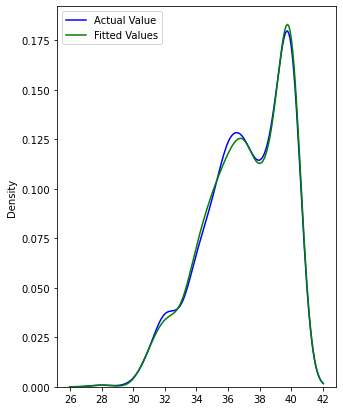

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(predictions, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()
